# Electricity Demand Forecast - Pre-Assessment1

In [1]:
# Apply ARIMA model for forecasting
## First overall, then sub-sector

# EDA to see trend and understand data
# Choose and apply method to make data stationary
# Choose and apply params for ARIMA model
# Forecast and analyse predictions

In [2]:
import pandas as pd
import numpy as np

# Explore Data

In [14]:
raw_data = pd.read_excel("./raw_dataset/SES T3-2 - SubSector Elec Consumption.xlsx")
#remove bottom 2 rows - not useful information
raw_data = raw_data[:-2]
raw_data['year'] = pd.to_datetime(raw_data['year'], format='%Y')
raw_data.tail()

,year,sector,sub_sector,consumption_GWh
301,2018-01-01,Overall,Overall,50460.9
302,2019-01-01,Overall,Overall,51730.1
303,2020-01-01,Overall,Overall,50779.6
304,2021-01-01,Overall,Overall,53483.5
305,2022-01-01,Overall,Overall,26933.0


In [15]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             306 non-null    datetime64[ns]
 1   sector           306 non-null    object        
 2   sub_sector       306 non-null    object        
 3   consumption_GWh  306 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 9.7+ KB


<AxesSubplot: xlabel='year'>

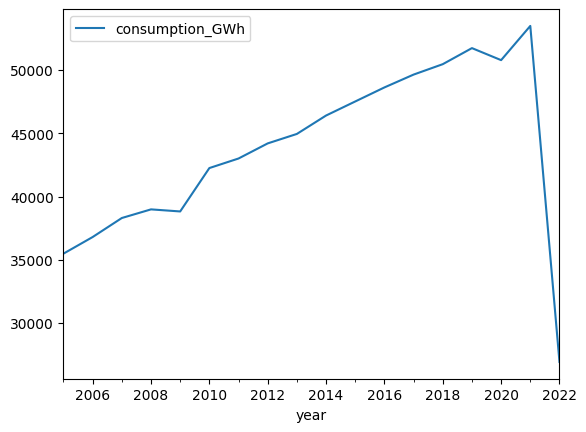

In [19]:
# Plot overall chart
raw_data[raw_data['sector']=='Overall'].plot.line(x='year', y='consumption_GWh')

In [23]:
# Plot other charts
raw_pivoted = raw_data.pivot(index='year',columns='sub_sector', values='consumption_GWh')

array([<AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>,
       <AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>,
       <AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>,
       <AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>,
       <AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>,
       <AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>,
       <AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>,
       <AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>,
       <AxesSubplot: xlabel='year'>], dtype=object)

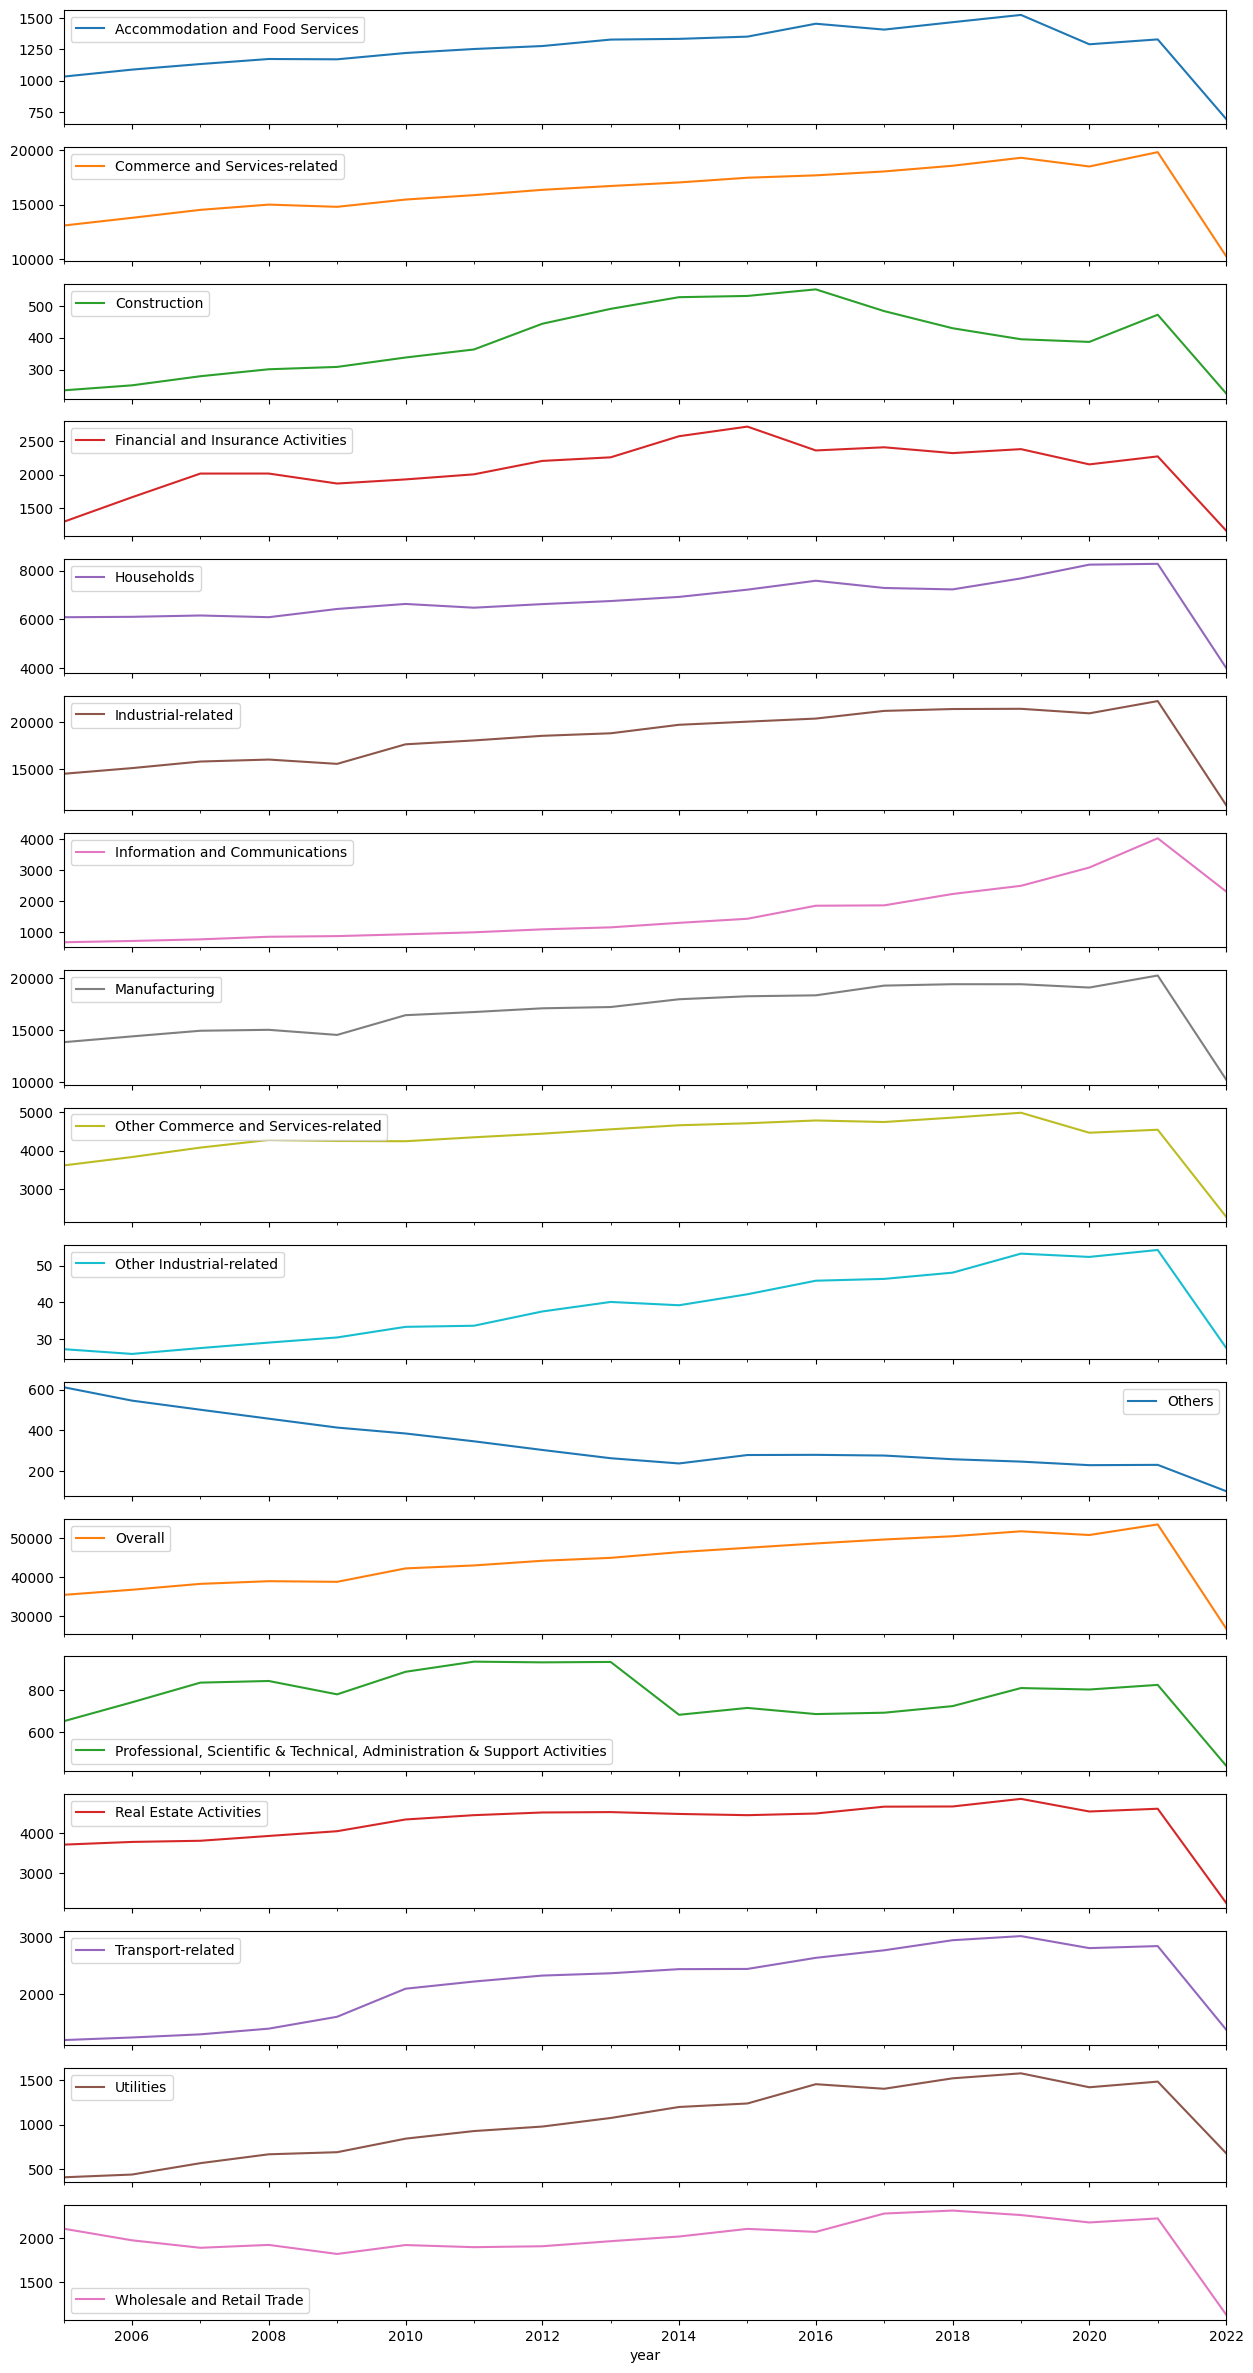

In [28]:
raw_pivoted.plot.line(subplots=True, figsize=(15, 30))

# Make data stationary

In [34]:
# Excluded 2022 data since it is not complete
ts_data = raw_data[raw_data.year.dt.year != 2022]

In [35]:
ts_overall = ts_data[ts_data['sub_sector']=="Overall"]
ts_overall

,year,sector,sub_sector,consumption_GWh
288,2005-01-01,Overall,Overall,35489.3
289,2006-01-01,Overall,Overall,36801.8
290,2007-01-01,Overall,Overall,38304.9
291,2008-01-01,Overall,Overall,38986.9
292,2009-01-01,Overall,Overall,38822.9
293,2010-01-01,Overall,Overall,42251.8
294,2011-01-01,Overall,Overall,43007.1
295,2012-01-01,Overall,Overall,44200.7
296,2013-01-01,Overall,Overall,44948.8
297,2014-01-01,Overall,Overall,46403.0


In [39]:
ts_overall['first_diff'] = ts_overall['consumption_GWh'].diff()
ts_overall

C:\Users\Personal\AppData\Local\Temp\ipykernel_27364\1481688669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_overall['first_diff'] = ts_overall['consumption_GWh'].diff()


,year,sector,sub_sector,consumption_GWh,first_diff
288,2005-01-01,Overall,Overall,35489.3,NaN
289,2006-01-01,Overall,Overall,36801.8,1312.5
290,2007-01-01,Overall,Overall,38304.9,1503.1
291,2008-01-01,Overall,Overall,38986.9,682.0
292,2009-01-01,Overall,Overall,38822.9,-164.0
293,2010-01-01,Overall,Overall,42251.8,3428.9
294,2011-01-01,Overall,Overall,43007.1,755.3
295,2012-01-01,Overall,Overall,44200.7,1193.6
296,2013-01-01,Overall,Overall,44948.8,748.1
297,2014-01-01,Overall,Overall,46403.0,1454.2


<AxesSubplot: xlabel='year'>

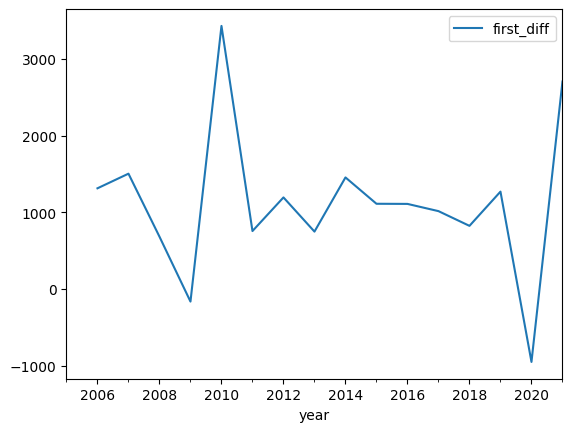

In [40]:
ts_overall.plot.line(x='year', y='first_diff')

In [41]:
ts_overall['second_diff'] = ts_overall['first_diff'].diff()
ts_overall

C:\Users\Personal\AppData\Local\Temp\ipykernel_27364\396944071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_overall['second_diff'] = ts_overall['first_diff'].diff()


,year,sector,sub_sector,consumption_GWh,first_diff,second_diff
288,2005-01-01,Overall,Overall,35489.3,NaN,NaN
289,2006-01-01,Overall,Overall,36801.8,1312.5,NaN
290,2007-01-01,Overall,Overall,38304.9,1503.1,190.6
291,2008-01-01,Overall,Overall,38986.9,682.0,-821.1
292,2009-01-01,Overall,Overall,38822.9,-164.0,-846.0
293,2010-01-01,Overall,Overall,42251.8,3428.9,3592.9
294,2011-01-01,Overall,Overall,43007.1,755.3,-2673.6
295,2012-01-01,Overall,Overall,44200.7,1193.6,438.3
296,2013-01-01,Overall,Overall,44948.8,748.1,-445.5
297,2014-01-01,Overall,Overall,46403.0,1454.2,706.1


<AxesSubplot: xlabel='year'>

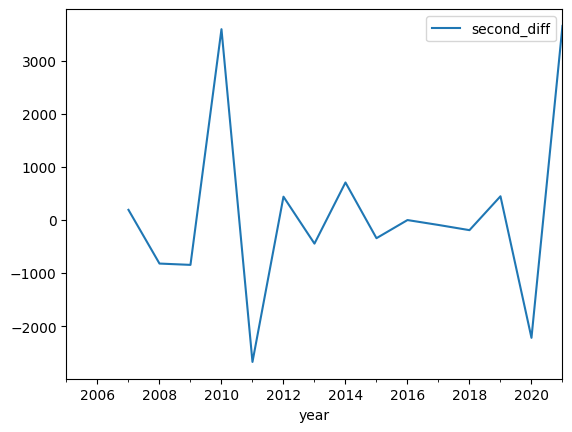

In [42]:
ts_overall.plot.line(x='year', y='second_diff')

# Check AR and MA params

ValueError: could not broadcast input array from shape (17,) into shape (41,)

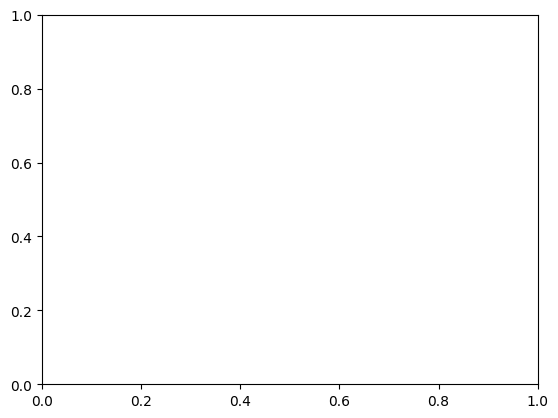

In [63]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_overall.reset_index()['second_diff'], lags=40) 

LinAlgError: SVD did not converge in Linear Least Squares

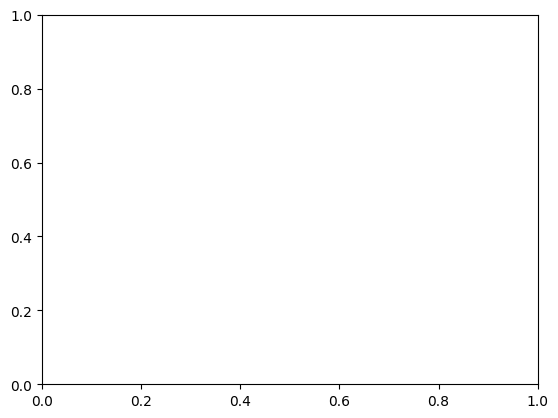

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts_overall.reset_index()['second_diff'], lags=7, method = "ols")

In [57]:
ts_overall.reset_index()

,index,year,sector,sub_sector,consumption_GWh,first_diff,second_diff
0,288,2005-01-01,Overall,Overall,35489.3,NaN,NaN
1,289,2006-01-01,Overall,Overall,36801.8,1312.5,NaN
2,290,2007-01-01,Overall,Overall,38304.9,1503.1,190.6
3,291,2008-01-01,Overall,Overall,38986.9,682.0,-821.1
4,292,2009-01-01,Overall,Overall,38822.9,-164.0,-846.0
5,293,2010-01-01,Overall,Overall,42251.8,3428.9,3592.9
6,294,2011-01-01,Overall,Overall,43007.1,755.3,-2673.6
7,295,2012-01-01,Overall,Overall,44200.7,1193.6,438.3
8,296,2013-01-01,Overall,Overall,44948.8,748.1,-445.5
9,297,2014-01-01,Overall,Overall,46403.0,1454.2,706.1
